In [1]:
#reading data from glass.csv file using pandas read_csv
import pandas as pd
zooKNN=pd.read_csv('Zoo.csv')
zooKNN=pd.DataFrame(zooKNN)
#inspecting columns and rows of glass dataframe
zooKNN

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#Different types of glasses
zooKNN["type"].drop_duplicates()

0     1
2     4
11    2
13    7
24    6
25    5
62    3
Name: type, dtype: int64

In [6]:
#Storing inputs into X
X = zooKNN.iloc[:,1:17]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
#Storing outputs/labels into Y
Y = zooKNN.iloc[:,17:18]
Y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [9]:
#importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#Searching for opitamal K value
# list of integers 1 to 30
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# We will loop through reasonable values of k
#Fit the data into model for different k values
#Store accuracy scores in to k_scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    scores = knn.score(X, Y)
    k_scores.append(scores.mean())

<ipython-input-10-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-10-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-10-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-10-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-10-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

Text(0, 0.5, 'Cross-Validated Accuracy')

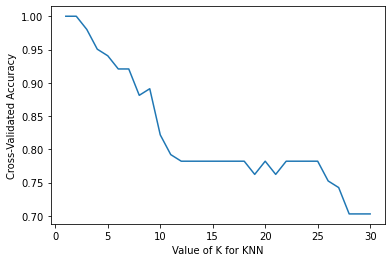

In [11]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [16]:
#k=9 gives 90% accuracy
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X, Y)

<ipython-input-16-1bd6d57ce96f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X, Y)


KNeighborsClassifier(n_neighbors=9)

In [17]:
#Predicting values
print(neigh.predict([[0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0]]))

[4]


In [18]:
#Predicting values
print(neigh.predict([[0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1]]))

[2]


In [19]:
#Predicting values
print(neigh.predict([[0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0]]))

[6]
